# 《 Python 数据科学手册》 用随机森林识别手写数字

In [3]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

### 认识 digits 数据集

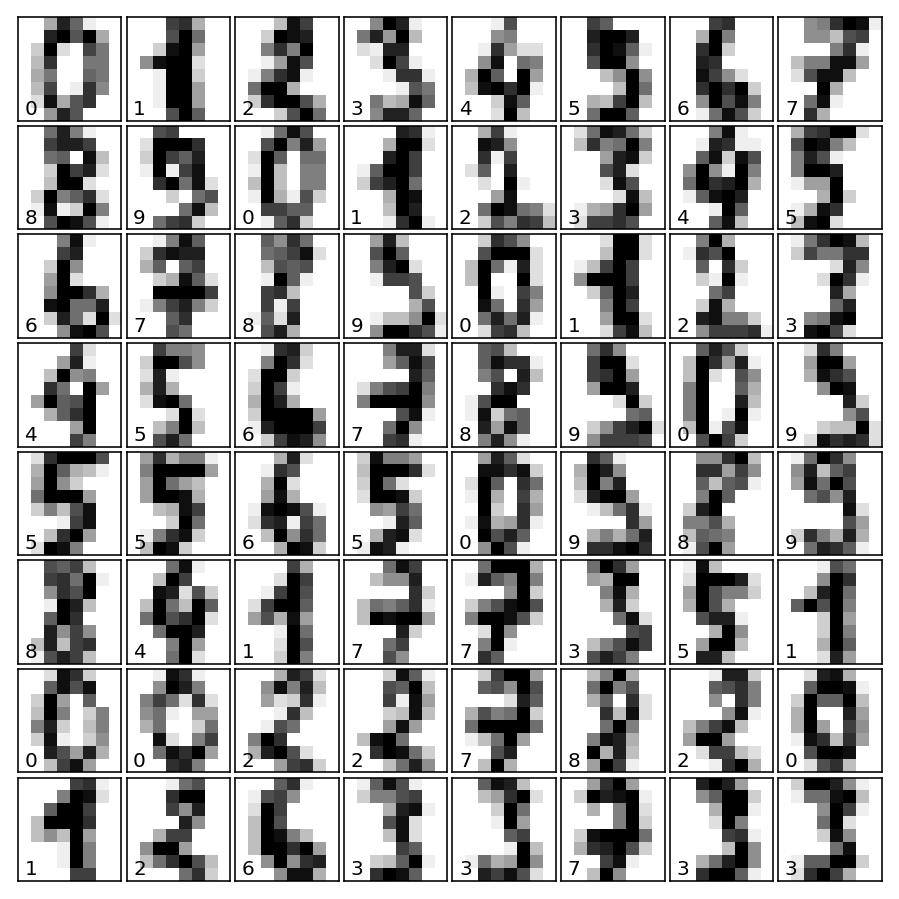

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    # 用 target 给每个图做标注
    # interpolation 表示插值方法
    ax.text(0, 7, str(digits.target[i]),interpolation='nearest')

plt.show()

## 分离训练数据集与测试数据集

In [7]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                random_state=0)

In [8]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
ypred = model.predict(X_test)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 查看评估报告

In [9]:
from sklearn import metrics

print(metrics.classification_report(y_test, ypred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        37
          1       0.98      0.98      0.98        43
          2       1.00      0.95      0.98        44
          3       0.98      0.98      0.98        45
          4       1.00      0.97      0.99        38
          5       0.96      0.98      0.97        48
          6       1.00      1.00      1.00        52
          7       0.96      1.00      0.98        48
          8       0.98      0.96      0.97        48
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



可以看到预测效果还不错。

## 使用 seaborn 绘制热力图，看看哪些数字预测错了

cmap 是 matplotlib 的对象。
可以在 https://matplotlib.org/examples/color/colormaps_reference.html 查看。

Seaborn 热力图：https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=cmap 。

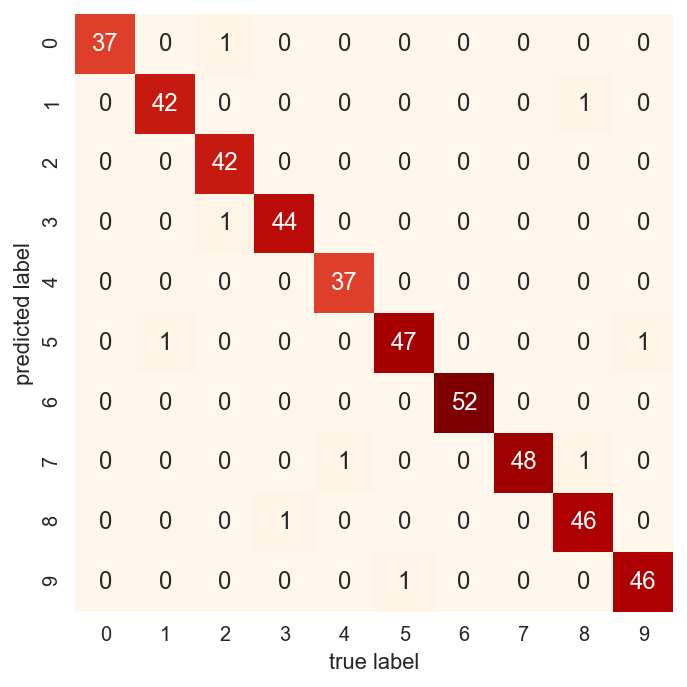

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

# sns.set_style('white')

# 混淆矩阵
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='OrRd')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()